# <center> Simulación caso de Negocio - Web Scraping </center>

El objetivo de esta actividad es diseñar e implementar un modelo de Análisis de Sentimientos a través de Web Scraping con Python para la resolución de un problema en el que cuenta con variables numéricas y categóricas y en el que se busca fortalecer los conocimientos teóricos y prácticos de la aplicación un sistema de recomendación en una empresa. 

💡 _**Nota**_: _Este material ha sido preparado por la **Universidad de las Américas - UDLA**. Parte del contenido ha sido adaptado a partir de material público liberado en [Kaggle](http://kaggle.com), [Datacamp](http://datacamp.com) y otros sitios web._

## 1. Evaluación de necesidades del negocio
La fase de evaluación del caso de negocio requiere que se cree, evalúe y apruebe un caso de negocio antes de proceder a las tareas reales de análisis práctico.

El objetivo de este estudio es determinar los niveles de satisfacción del cliente entre las personas que han realizado compras de alimentos mediante el empleo de un algoritmo de análisis de sentimiento.

# 2. Identificación de datos
La etapa de identificación de datos consiste en identificar los conjuntos de datos necesarios para el proyecto de análisis y sus fuentes.


In [56]:
import pandas as pd

In [57]:
df= pd.read_csv('Reviews.csv')
df.size

5684540

In [58]:
df = df[df['Id']<10000]

In [59]:
df.size

99990

In [60]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [61]:
df = df[["Score","Text"]]

Dentro de la base de datos tenemos dos campos (score y text) que nos permiran realizar el estudio.

# 3. Adquisición y filtrado de datos
Durante la etapa de adquisición y filtrado de datos se recopilan los datos de todas las fuentes de datos que se identificaron durante la etapa Identificación de datos.

# 4. Extracción de datos
Durante esta etapa se debe extraer datos dispares y transformarlos en un formato que pueda facilitar el análisis de datos. 

**Importar librerías**
```Python
# Sintaxis general
import modulo as alias
- **modulo**: (módulo) librería a importar.
- **alias**: alias con el nos referiremos a la libería. 
Ejemplo: 
  - Importamos la librería pandas:
import pandas as pd
```

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from wordcloud import WordCloud, STOPWORDS



**Cargar el dataset**

```Python
Leemos un archivo usando el alias **pd**, luego punto **.**, y a seguir la función a utilizar **read_csv**.
Ejemplo:
df = pd.read_csv("data/nombre_archivo.csv")
```

# 5.Validación y limpieza de datos
Los datos no válidos pueden sesgar y falsear los resultados de los análisis. La etapa de validación y depuración de datos se enfoca en establecer reglas de validación a menudo complejas y a eliminar cualquier dato no válido conocido.

**EDA - Análisis exploratorio de datos**

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Score   9999 non-null   int64 
 1   Text    9999 non-null   object
dtypes: int64(1), object(1)
memory usage: 234.4+ KB


In [64]:
df['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

**Limpieza de datos**

Aparentement no existe valores nulos pero es comun que los algoritmos que recolectan los datos en el web scrapping recolecte algun algoritmo a manera de string ''.

In [65]:
df['Text'].replace(" ", np.nan, inplace=True) # replacing space with nan

df.dropna(inplace=True) #drop nan values, coz some of review didn't have actual review


In [66]:
df["Text"] = df["Text"].apply(lambda x: x.lower())

In [67]:
df['Text'][0]

'i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than  most.'

In [68]:
stop_words = set(stopwords.words('english'))

In [69]:
spec_chars = ["±","@","#","$","%","^",
                 "&","*","(",")","_","+","=",
                 "-","/",">","<","?",
                 "~","`","'","[","]","|","}",
                 "{",'"', ".",",","!",";"]

for char in spec_chars:
    df["Text"] = df["Text"].apply(lambda x: x.replace(char, '')) 

df["Text"].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii')) # getting rid of emojis

df['Text'] = df['Text'].replace('\d+', '') # Remove numbers from Reviews

In [70]:
df['Text'][0]

'i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than  most'

**Transformación de datos**

La tokenización es el proceso de dividir un texto o una secuencia de caracteres en unidades más pequeñas llamadas tokens. En el procesamiento de lenguaje natural (NLP), la tokenización juega un papel fundamental, ya que a menudo es el primer paso en el preprocesamiento de datos textuales.

In [71]:
stop_words = set(stopwords.words('english')) # eng stopwords
df['tokenized_text'] = df.apply(lambda row: word_tokenize(row['Text']), axis=1) # Tokenization of reviews


In [72]:
df['tokenized_text'][0]

['i',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them',
 'all',
 'to',
 'be',
 'of',
 'good',
 'quality',
 'the',
 'product',
 'looks',
 'more',
 'like',
 'a',
 'stew',
 'than',
 'a',
 'processed',
 'meat',
 'and',
 'it',
 'smells',
 'better',
 'my',
 'labrador',
 'is',
 'finicky',
 'and',
 'she',
 'appreciates',
 'this',
 'product',
 'better',
 'than',
 'most']

In [73]:
df["filtered"] = df['tokenized_text'].apply(lambda x: [item for item in x if item not in stop_words])

Finalmente tenemos todos los 

In [74]:
df["filtered"]

0       [bought, several, vitality, canned, dog, food,...
1       [product, arrived, labeled, jumbo, salted, pea...
2       [confection, around, centuries, light, pillowy...
3       [looking, secret, ingredient, robitussin, beli...
4       [great, taffy, great, price, wide, assortment,...
                              ...                        
9994    [switched, similac, advanced, organic, daughte...
9995    [switched, advance, similac, organic, product,...
9996    [like, bad, reviews, say, organic, formula, co...
9997    [wanted, solely, breastfeed, unable, keep, sup...
9998    [love, fact, get, delieved, house, delievy, ch...
Name: filtered, Length: 9999, dtype: object

# 6. Agregación y representación de datos
La etapa de agregación y representación de datos, se dedica a integrar múltiples conjuntos de datos para obtener una visión unificada.

In [75]:
df['filtered']=df['filtered'].apply(str)
cv = CountVectorizer(lowercase=False,stop_words='english',binary=True)
cv.fit(df["filtered"])


CountVectorizer(binary=True, lowercase=False, stop_words='english')

# 7. Análisis de datos
La etapa de análisis de datos se enfoca en llevar a cabo la tarea de análisis propiamente dicha, que suele implicar uno o más tipos de análisis

In [76]:
X = cv.transform(df["filtered"])
y = df["Score"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

## Implementación

### Entrenamiento del modelo K-means

# 8. Visualización de datos
La capacidad de analizar grandes cantidades de datos y obtener información útil tiene poco valor si los únicos que pueden interpretar los resultados son los analistas.
La etapa de visualización de datos se dedica a utilizar técnicas y herramientas de visualización de datos para comunicar gráficamente los resultados del análisis con vistas a una interpretación eficaz por parte de los usuarios empresariales.

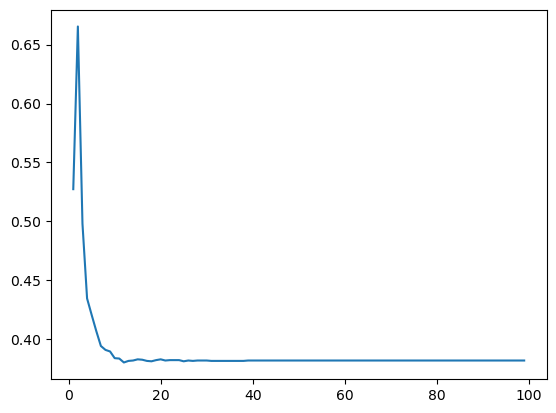

In [77]:
errors = []
for k in range(1,100):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    errors.append(np.mean(pred!=y_test))
plt.plot(range(1,100),errors)
plt.show()

In [78]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
print("K-Nearest Neighbours accuracy score: {}".format(accuracy_score(y_test, knn.predict(X_test))))

K-Nearest Neighbours accuracy score: 0.6186666666666667


In [79]:
MNB = MultinomialNB()
MNB.fit(X_train,y_train)
print("Multinomial Naive Bayes accuracy score: {}".format(accuracy_score(y_test, MNB.predict(X_test))))

Multinomial Naive Bayes accuracy score: 0.6503333333333333


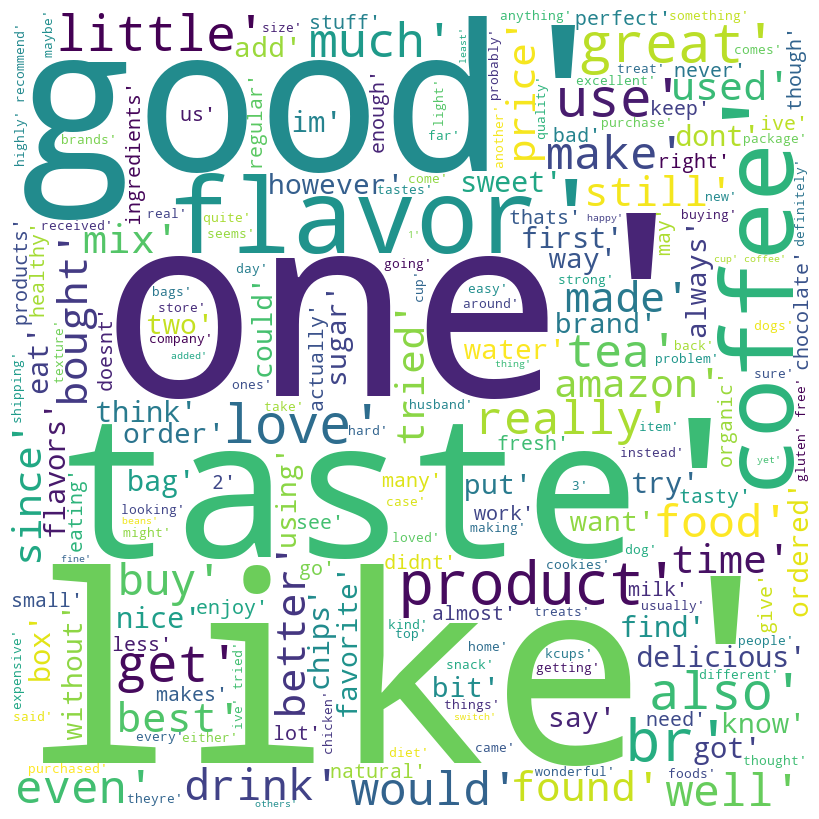

In [80]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(' '.join(df['filtered']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# 9. Utilización de los resultados del análisis
Después de que los resultados del análisis se pongan a disposición de los usuarios de negocio para apoyar la toma de decisiones empresariales, por ejemplo a través de cuadros de mando o paneles, puede haber más oportunidades para utilizar los resultados del análisis. La etapa de utilización de los resultados del análisis, esta enfocada en determinar cómo y dónde se pueden aprovechar más los datos del análisis procesado.

El objetivo del análisis de sentimientos fue  identificar automáticamente el sentimiento detrás de un texto de los clientes que compraron la comida, ya sea positivo, negativo o neutral.  Tmabien se podria usar ampliamente en varias aplicaciones en todas las industrias, incluido el monitoreo de redes sociales, la gestión de la reputación de la marca, el análisis de comentarios de los clientes, la investigación de mercado y más.


Al utilizar el algoritmo de puntaje de precisión K-Nearest Neighbors, logramos un nivel notable de precisión. Sin embargo, vale la pena señalar que es probable que la precisión de nuestros resultados mejore aún más con la inclusión de un conjunto de datos más grande. Dada la complejidad computacional involucrada, confiamos en un conjunto de datos que comprende solo 10,000 datos. La expansión del conjunto de datos sin duda produciría una mayor precisión y permitiría un análisis más completo.

In [83]:
# Qué acciones sugerería a los directivos de la empresa?


Al analizar la nube de palabras, se hace evidente que la satisfacción del cliente varía según los diferentes productos alimenticios. Para mejorar la experiencia general del cliente, recomiendo que la empresa priorice mejorar la calidad de los productos con índices de satisfacción más bajos.

Con la ayuda de la nube de palabras, podemos discernir información valiosa sobre los niveles de satisfacción del cliente entre los compradores de alimentos. Para garantizar la mejora continua y mejorar la experiencia general del cliente, es esencial que la empresa concentre sus esfuerzos en mejorar la calidad de los productos que han recibido calificaciones de satisfacción más bajas.